# Handaling Missing Data

In [90]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [77]:
dataset= pd.read_csv('/content/Exercise-CarData.csv - Exercise-CarData.csv.csv')
print("Data:\n",dataset)
print("Data Statistic:\n",dataset.describe(include='all'))
print("\nData Info:")
print(dataset.info())

Data:
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]
Data Statistic:
          Unnamed: 0         Price          Age  ...           CC Doors    

In [78]:
dataset.isnull().sum()


Unnamed: 0      0
Price           0
Age           100
KM              0
FuelType      100
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [79]:
dataset.dropna(axis=0,how='all',inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 134.6+ KB


In [80]:
dataset.dropna(axis=0,how='any',inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1111 non-null   int64  
 1   Price       1111 non-null   int64  
 2   Age         1111 non-null   float64
 3   KM          1111 non-null   object 
 4   FuelType    1111 non-null   object 
 5   HP          1111 non-null   object 
 6   MetColor    1111 non-null   float64
 7   Automatic   1111 non-null   int64  
 8   CC          1111 non-null   int64  
 9   Doors       1111 non-null   object 
 10  Weight      1111 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 104.2+ KB


In [81]:
dataset.isnull().sum()
#check if any value has null value

Unnamed: 0    0
Price         0
Age           0
KM            0
FuelType      0
HP            0
MetColor      0
Automatic     0
CC            0
Doors         0
Weight        0
dtype: int64

In [82]:
#any value which not match data's value format change it's formate according to it
dataset=dataset.replace(to_replace="??",value=55000)
dataset

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,55000,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,55000,Petrol,86,0.0,0,1300,3,1015


In [83]:
#any value which not match data's value format change it's formate according to it
dataset=dataset.replace(to_replace="three",value=3)
dataset

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,55000,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,55000,Petrol,86,0.0,0,1300,3,1015


# Data transformation

In [84]:
#removing line which are not mandatory 
dataset.head(5)
X_new = dataset.iloc[:,1:4].values
print("\n\nX for transformation : \n", X_new)



X for transformation : 
 [[13500 23.0 '46986']
 [13750 23.0 '72937']
 [14950 26.0 '48000']
 ...
 [8450 80.0 '23000']
 [10845 72.0 55000]
 [6950 76.0 '1']]


In [85]:
#performing scaling on price age KM HP and CC
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.33983287 0.27848101 0.19335471]
 [0.34911792 0.27848101 0.30014938]
 [0.39368617 0.3164557  0.19752756]
 ...
 [0.15227484 1.         0.09464648]
 [0.24122563 0.89873418 0.22633426]
 [0.09656453 0.94936709 0.        ]]


In [86]:
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.73687953 -1.73138817 -0.5843726 ]
 [ 0.80448309 -1.73138817  0.10042565]
 [ 1.12898017 -1.57198932 -0.55761504]
 ...
 [-0.62871237  1.29719009 -1.21731819]
 [ 0.01892973  0.87212647 -0.37289816]
 [-1.03433373  1.08465828 -1.8242187 ]]


# Handaling Categorial Data

In [87]:
print(dataset)
dataset.describe()

      Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000      3    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
5              5  12950  32.0  61000  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1425        1425   7950  80.0  55000  ...         0  1300      4    1000
1429        1429   8950  78.0  24000  ...         1  1300      5    1065
1430        1430   8450  80.0  23000  ...         0  1300      3    1015
1432        1432  10845  72.0  55000  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1111 rows x 11 columns]


,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,707.868587,10774.997300,55.585959,0.675068,0.053105,1569.463546,1073.870387
std,414.023750,3699.695538,18.829188,0.468561,0.224344,185.935691,52.610513
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.000000
25%,347.500000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1045.000000
50%,703.000000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.000000
75%,1069.500000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1090.000000
max,1435.000000,31275.000000,80.000000,1.000000,1.000000,2000.000000,1615.000000


In [88]:
# All rows, all columns except last 
X = dataset.iloc[:, :-1].values 
  
# Only last column  
Y = dataset.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 



Input : 
 [[0 13500 23.0 ... 0 2000 3]
 [1 13750 23.0 ... 0 2000 '3']
 [3 14950 26.0 ... 0 2000 '3']
 ...
 [1430 8450 80.0 ... 0 1300 '3']
 [1432 10845 72.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


In [91]:
le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X) 



Input : 
 [[0 13500 23.0 ... 0 2000 3]
 [1 13750 23.0 ... 0 2000 '3']
 [2 14950 26.0 ... 0 2000 '3']
 ...
 [1108 8450 80.0 ... 0 1300 '3']
 [1109 10845 72.0 ... 0 1300 '3']
 [1110 6950 76.0 ... 0 1600 '5']]


In [93]:
dummy = pd.get_dummies(dataset['FuelType'])
print("\n\nDummy :\n",dummy)




Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
3       0       1       0
4       0       1       0
5       0       1       0
...   ...     ...     ...
1425    0       0       1
1429    0       0       1
1430    0       0       1
1432    0       0       1
1435    0       0       1

[1111 rows x 3 columns]


In [94]:
dataset = pd.concat([dummy,dataset],axis=1)
print("\n\nFinal Data :\n",dataset)



Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  ...  Automatic    CC Doors Weight
0       0       1       0           0  ...          0  2000     3   1165
1       0       1       0           1  ...          0  2000     3   1165
3       0       1       0           3  ...          0  2000     3   1165
4       0       1       0           4  ...          0  2000     3   1170
5       0       1       0           5  ...          0  2000     3   1170
...   ...     ...     ...         ...  ...        ...   ...   ...    ...
1425    0       0       1        1425  ...          0  1300     4   1000
1429    0       0       1        1429  ...          1  1300     5   1065
1430    0       0       1        1430  ...          0  1300     3   1015
1432    0       0       1        1432  ...          0  1300     3   1015
1435    0       0       1        1435  ...          0  1600     5   1114

[1111 rows x 14 columns]


In [95]:
datasets=pd.read_csv('/content/Exercise-CarData.csv - Exercise-CarData.csv.csv')
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(datasets.FuelType.values.reshape(-1,1)).toarray()
print(x)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [96]:
dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(4)]) 
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column 
df= df.drop(['FuelType'], axis=1) 
#printing to verify 
print(df.head())

   Unnamed: 0  Price   Age     KM  ... Country_0  Country_1  Country_2  Country_3
0           0  13500  23.0  46986  ...       0.0        1.0        0.0        0.0
1           1  13750  23.0  72937  ...       0.0        1.0        0.0        0.0
2           2  13950  24.0  41711  ...       0.0        1.0        0.0        0.0
3           3  14950  26.0  48000  ...       0.0        1.0        0.0        0.0
4           4  13750  30.0  38500  ...       0.0        1.0        0.0        0.0

[5 rows x 14 columns]


# Feature Selection Correlation

In [97]:
import seaborn as sns

In [100]:
datasets = datasets.iloc[:,:-1]
print(datasets.head())
print(datasets.info())

   Unnamed: 0  Price   Age     KM FuelType  HP  MetColor  Automatic    CC
0           0  13500  23.0  46986   Diesel  90       1.0          0  2000
1           1  13750  23.0  72937   Diesel  90       1.0          0  2000
2           2  13950  24.0  41711   Diesel  90       NaN          0  2000
3           3  14950  26.0  48000   Diesel  90       0.0          0  2000
4           4  13750  30.0  38500   Diesel  90       0.0          0  2000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  

In [101]:
corr = datasets.corr()
corr.head()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC
Unnamed: 0,1.000000,-0.738289,0.907090,-0.078616,0.066299,-0.184490
Price,-0.738289,1.000000,-0.878407,0.112041,0.033081,0.165067
Age,0.907090,-0.878407,1.000000,-0.099659,0.032573,-0.120706
MetColor,-0.078616,0.112041,-0.099659,1.000000,-0.013973,0.029189
Automatic,0.066299,0.033081,0.032573,-0.013973,1.000000,-0.069321


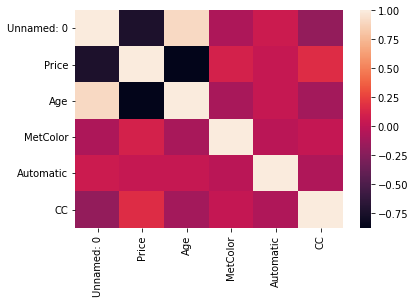

In [102]:
sns.heatmap(corr)

In [103]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [104]:
selected_columns = datasets.columns[j+1]
data = datasets[selected_columns]
print(data)

0       1.0
1       1.0
2       NaN
3       0.0
4       0.0
       ... 
1431    1.0
1432    0.0
1433    0.0
1434    1.0
1435    0.0
Name: MetColor, Length: 1436, dtype: float64
